<a href="https://colab.research.google.com/github/tanmayi-sharma/Parking-Citations-Analysis/blob/main/Notebooks/Additional_Time_Series_comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TIMESERIES COMPARISON OF COMMERCIAL AND NON-COMMERCIAL PARKING DATA WITH MOBILITY DATASETS


* This notebook contains timeseries comparisons between parking data
and the three mobility datasets published by Google, Apple and Meta.
* It majorly shows the Commercial and Non-Commercial Parking ticket count in comparison to the mobility timeseries.
* These are the following steps performed in this notebook to achieve the goal.


>1.   Libraries and Data Import
2.   Data preprocessing and manipulation
3. Time-series visualization of the three mobility datasets and parking data. (Google - Violet, Apple - Orange, Meta - Red)
3. Commercial and Non Commercial Parking data extraction from Parking Dataset.
4. Time-series comparison between Commercial/Non-Commercial parking data and the three mobility datasets along with necessary normalisation on Parking Data in accordance with Mobility datasets.









##1. Libraries and Data import , 2. Data preprocessing and manipulation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from matplotlib.pyplot import figure
%matplotlib inline

Importing parking dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Parking citations/parking_citations_covid_2020_2022.csv')

<ipython-input-3-5f9000c1f725>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Parking citations/parking_citations_covid_2020_2022.csv')


In [ ]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [ ]:
df['day'] = df['Issue Date'].dt.day_name()

In [ ]:
# df['Issue Date'] = pd.to_datetime(df['Issue Date'])
# df.dropna(subset = ['Issue time'],inplace = True)
# df['Issue time'].astype(int).astype(str).str.pad(4, fillchar='0')
# df['Issue time'] = pd.to_datetime(df['Issue time'], format = '%H%M', errors = 'coerce').dt.time
# df.to_csv('/content/drive/My Drive/Parking citations/parking_citations_covid__2020.csv')

Importing Google mobility dataset

In [ ]:
df_google = pd.read_csv('/content/drive/My Drive/Parking citations/google_mobility_concat.csv')

In [ ]:
df_google['date'] = pd.to_datetime(df_google['date'])

Importing Apple mobility dataset

In [ ]:
df_apple = pd.read_csv("/content/drive/My Drive/Parking citations/apple_mobility_modified.csv")

In [ ]:
df_apple['Date'] = pd.to_datetime(df_apple['Date'])

Importing Meta mobility dataset

In [ ]:
df_meta = pd.read_csv('/content/drive/My Drive/Parking citations/meta_mobility_concat.csv')

<ipython-input-3-eed66181ba1c>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('/content/drive/My Drive/Parking citations/meta_mobility_concat.csv')


In [ ]:
df_meta['ds'] = pd.to_datetime(df_meta['ds'])

##3. Time-series visualization of the three mobility datasets and parking data

Parking data timeseries plot : This plot shows the percentage change in count of daily tickets in Los Angeles.

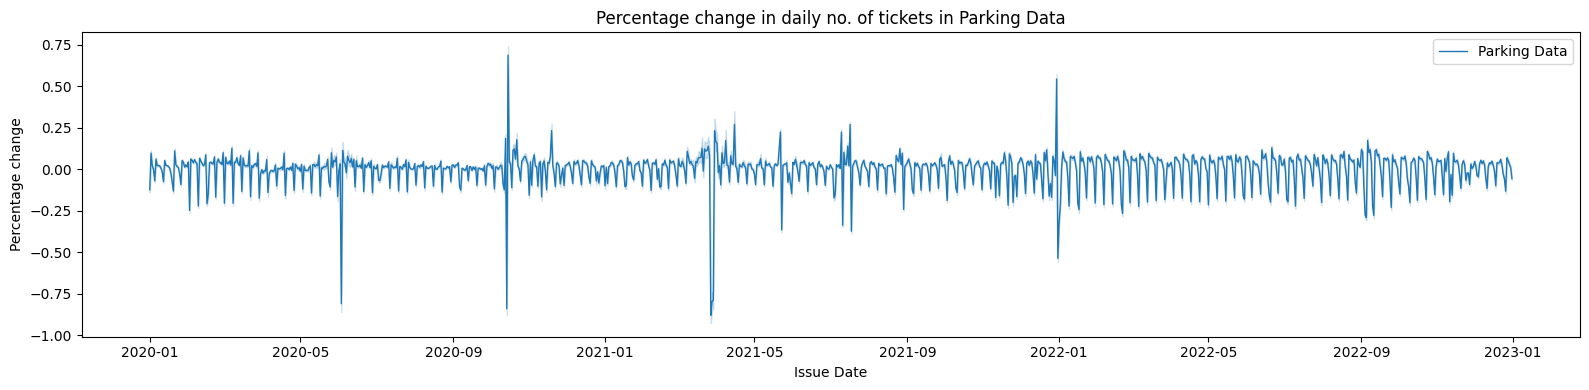

In [ ]:
dataframe = df[df['Issue Date']<='12-31-2022']
fig, axes = plt.subplots(1,1,figsize = (16,4))
sns.lineplot(data = dataframe ,x = 'Issue Date', y = (dataframe['Ticket number'].groupby(dataframe['Issue Date']).transform('count')).pct_change(), linewidth = 1, ax = axes,  label = 'Parking Data')
axes.set_ylabel("Percentage change")
axes.set_title('Percentage change in daily no. of tickets in Parking Data')
plt.tight_layout()
plt.show()


Google timeseries plots : The plot below shows the daily change of mobility from the baseline to different places in Los Angeles as observed by google.

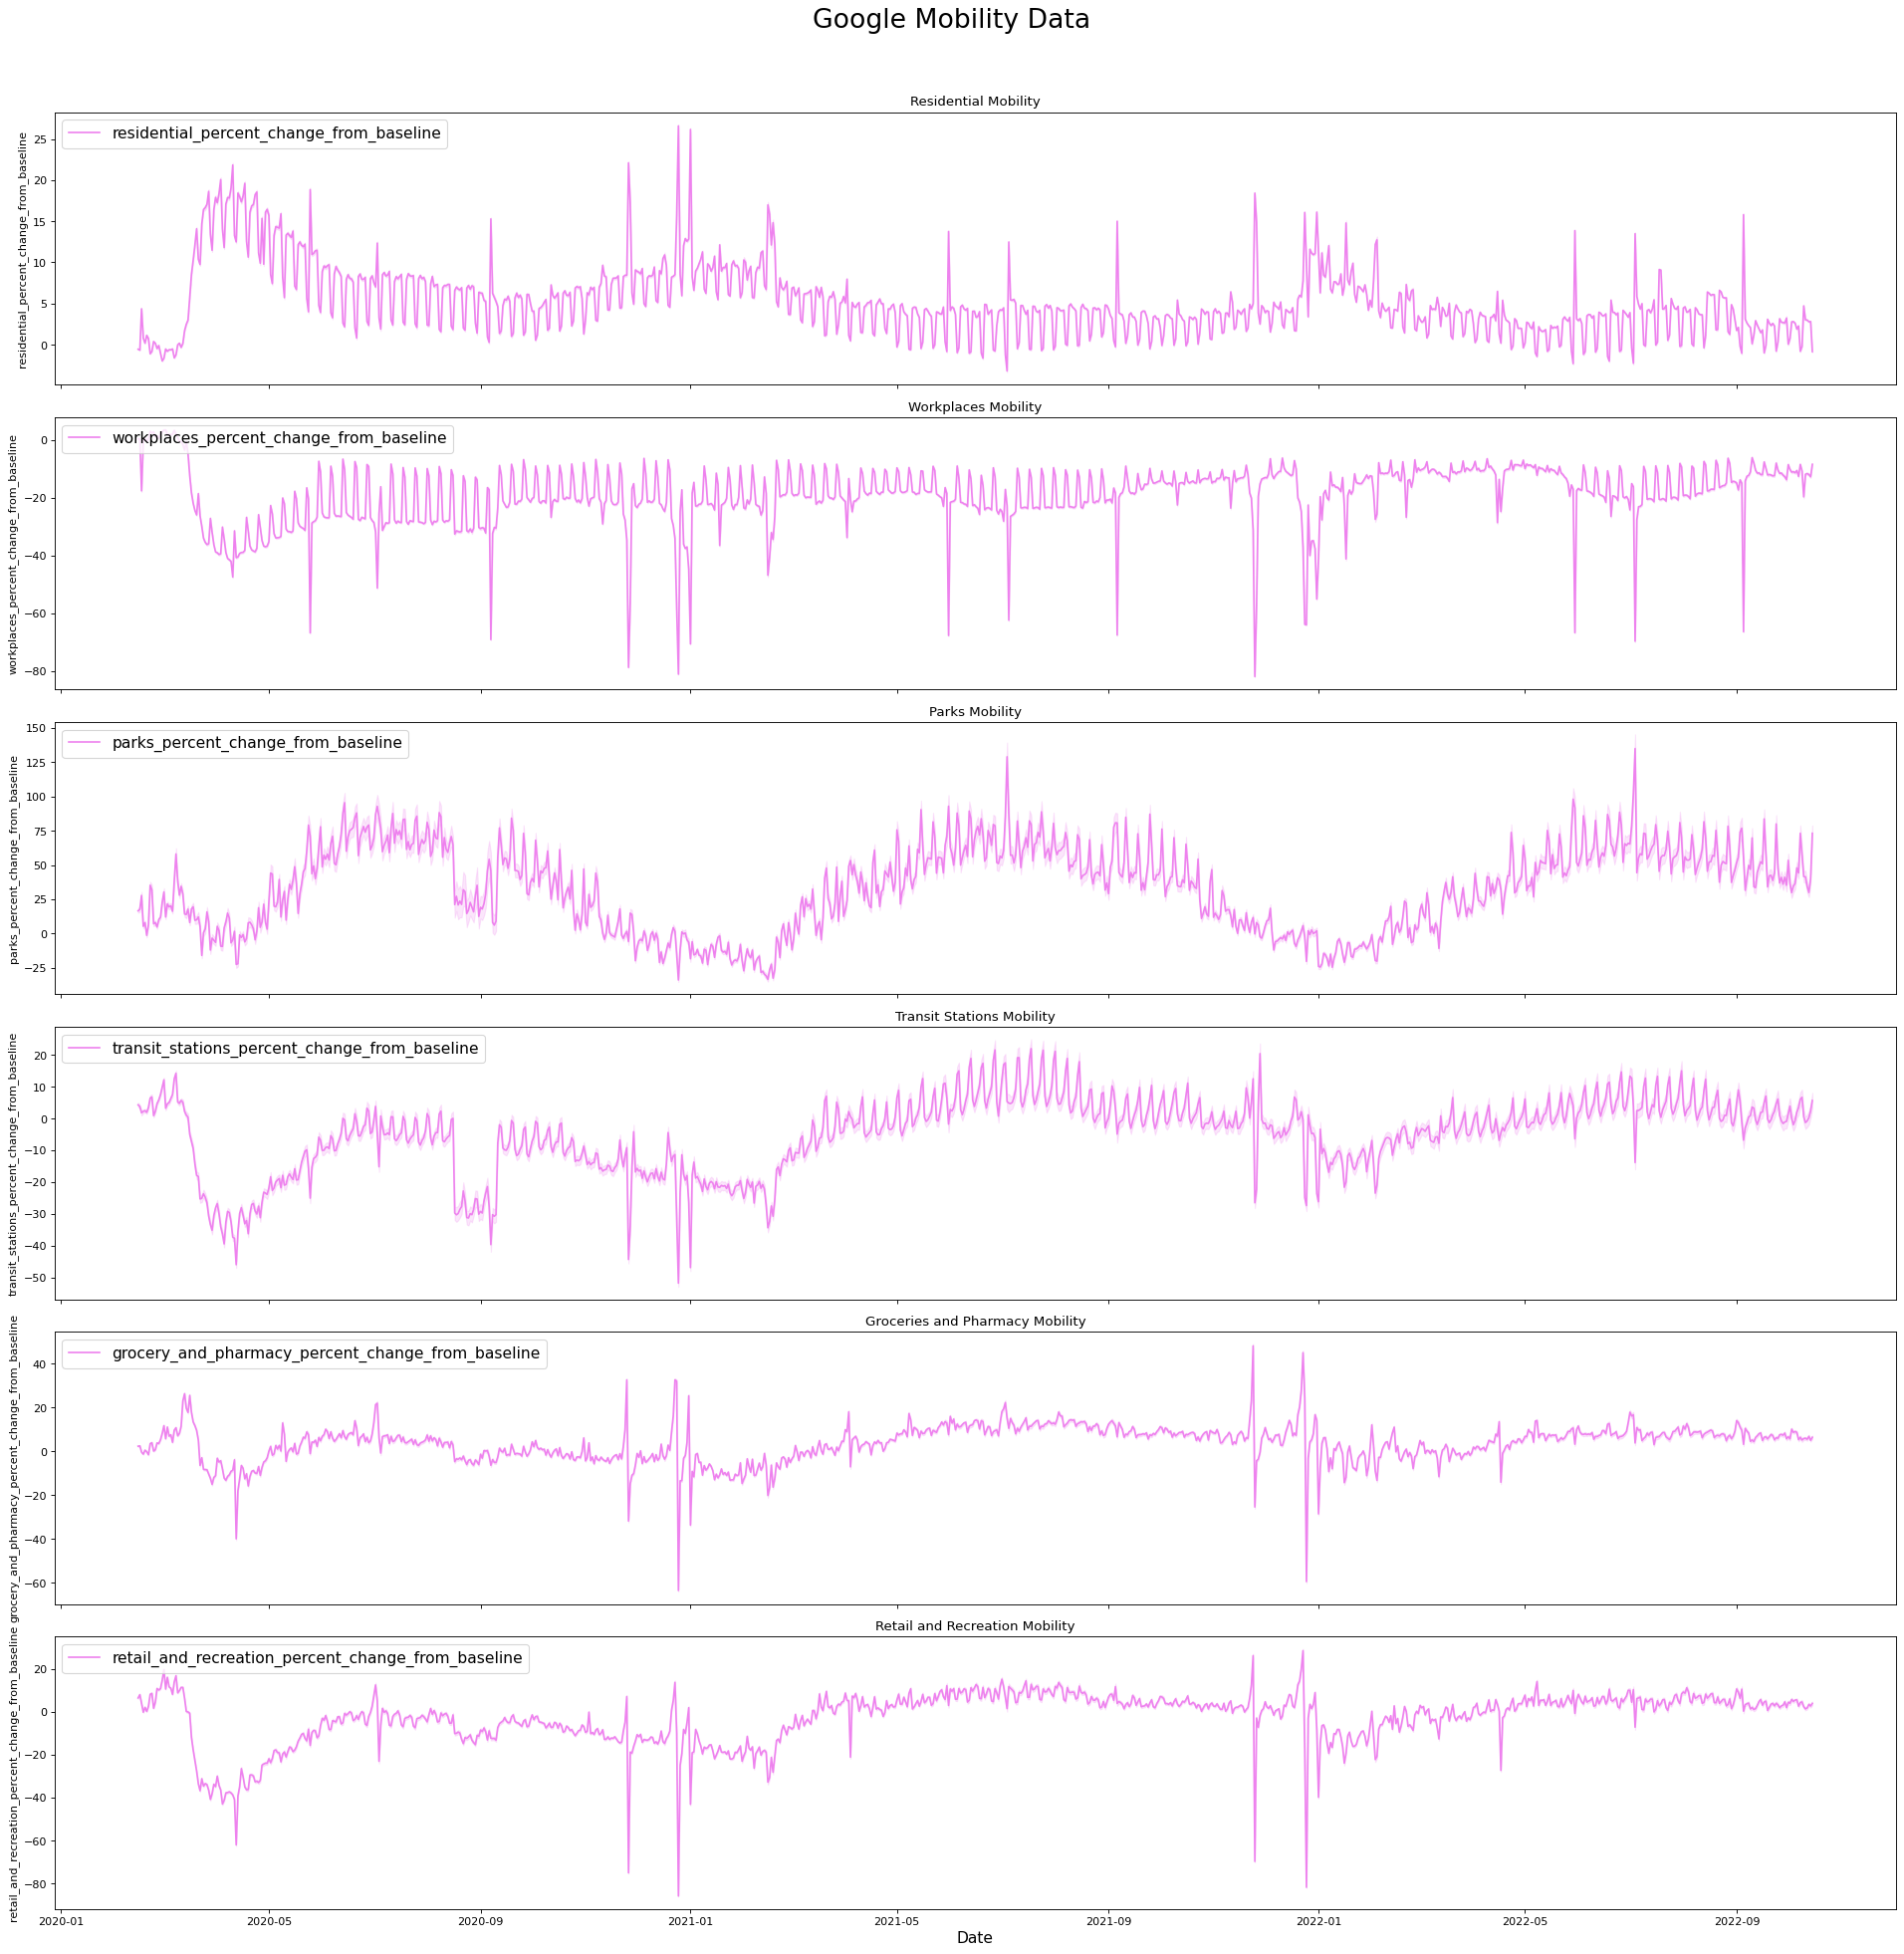

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(24, 24), dpi=80, sharex=True)
columns_to_compare = [
    "residential_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
    "parks_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "retail_and_recreation_percent_change_from_baseline"
]
subplot_titles = [
    "Residential Mobility",
    "Workplaces Mobility",
    "Parks Mobility",
    "Transit Stations Mobility",
    "Groceries and Pharmacy Mobility",
    "Retail and Recreation Mobility"
]
for i, (column,title) in enumerate(zip(columns_to_compare,subplot_titles)):
    sns.lineplot(data=df_google, x="date", y=column, label=column, ax=axes[i], color = 'Violet')
    #sns.lineplot(x=x_parking, y=y_parking, label='Parking Data', ax=axes[i])
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_title(title)
    axes[i].legend(loc = "upper left",fontsize = 14)
plt.suptitle('Google Mobility Data', fontsize=24, y=1.02)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
axes[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()


Apple timeseries plot : This plot shows the change in 'Driving' mobility in Los Angeles as obseved by Apple.


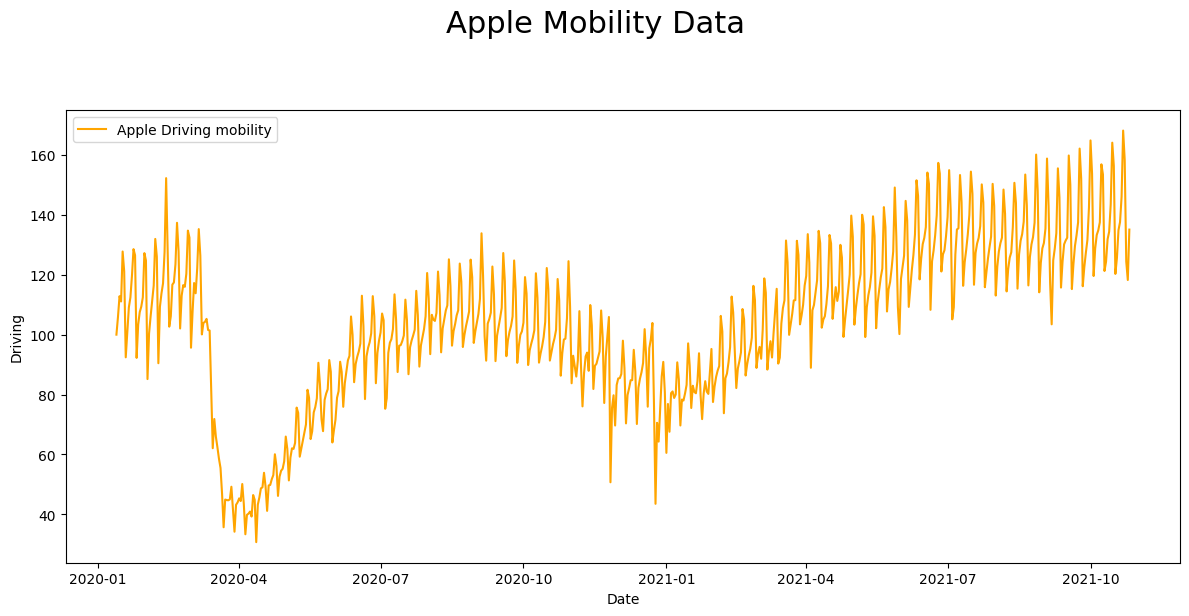

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
sns.lineplot(data=df_apple, x = 'Date', y='Driving',ax=axes, label = 'Apple Driving mobility', color = 'Orange')
#xticks = range(0, len(df_apple), 100)
#xticklabels = df_apple['Date'][::100]
#axes.set_xticks(xticks)
axes.legend(loc='upper left')
#axes.set_xticklabels(xticklabels)
plt.suptitle('Apple Mobility Data', fontsize=22, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Meta timeseries plot : This plot shows the change in Stayput and change in movement in Los Angeles as obseved by Meta.

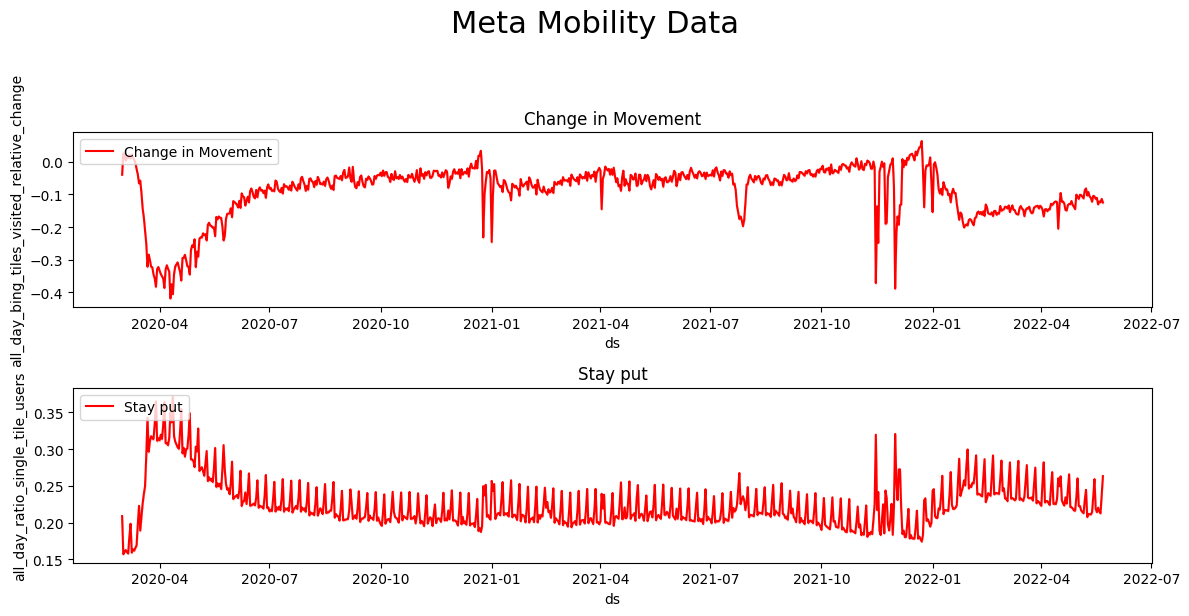

In [ ]:

fig, axes = plt.subplots(2,1,figsize=(12,6))
sns.lineplot(data=df_meta, x = 'ds', y='all_day_bing_tiles_visited_relative_change',ax=axes[0], label = 'Change in Movement', color = 'Red')
axes[0].legend(loc='upper left')
axes[0].set_title('Change in Movement')

sns.lineplot(data=df_meta, x = 'ds', y='all_day_ratio_single_tile_users',ax=axes[1], label = 'Stay put', color = 'Red')
axes[1].legend(loc='upper left')
axes[1].set_title('Stay put')
plt.suptitle('Meta Mobility Data', fontsize=22, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##4. Commercial and Non commercial Parking Data extraction from Parking citations Dataset

Knowing what are the type of vehicles in the parking dataset

In [ ]:
df['Body Style Description'].unique()

array(['PASSENGER CAR', 'PICK-UP TRUCK', 'VAN', 'MOTOR HOME',
       'COMMERCIAL', 'BUS', 'TRUCK', 'TRAILER', 'LIMOUSINE', 'TEST'],
      dtype=object)

In [ ]:
df['Body Style Description'].describe()

count           5757223
unique               10
top       PASSENGER CAR
freq            5256660
Name: Body Style Description, dtype: object

Using **mode imputation** technique for filling the null values in the 'Body Style Description' column in parking data.

In [ ]:
df['Body Style Description'] = df['Body Style Description'].fillna(df['Body Style Description'].mode()[0])

In [ ]:
df['Body Style Description'].isna().sum()

0

In [ ]:
commercial_vehicles = ['COMMERCIAL', 'BUS', 'TRUCK', 'TRAILER']
non_commercial_vehicles = ['PASSENGER CAR', 'PICK-UP TRUCK', 'VAN', 'MOTOR HOME','LIMOUSINE', 'TEST']

Creating seperate dataframes for commercial and non - commercial parking data

In [ ]:
commercial_vehicles_data = df[df['Body Style Description'].isin(commercial_vehicles)]

In [ ]:
non_commercial_vehicles_data = df[df['Body Style Description'].isin(non_commercial_vehicles)]

##5. Time-series comparison between Commercial/Non-Commercial parking data and the three mobility datasets

###Google timeseries

####Performing Median Normalization on Parking Data


Extracting data for Median normalization calculation

In [ ]:
filtered_df_google= df[(df['Issue Date'] >= '2020-01-01') & (df['Issue Date'] <= '2020-02-29')]

In [ ]:
filtered_df_google['day'] = filtered_df_google['Issue Date'].dt.day_name()

<ipython-input-46-a33149617d90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_google['day'] = filtered_df_google['Issue Date'].dt.day_name()


Computing median of number of tickets for each weekday

In [ ]:
med_list= []
weekdays = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
for i in range(len(weekdays)):
    m = filtered_df_google[filtered_df_google['day'] == weekdays[i]]
    c = m.groupby('Issue Date')['Ticket number'].count()
    a = c.median()
    med_list.append(a)

In [ ]:
median_weekdays = pd.DataFrame({'Weekday' : weekdays, 'Median_baseline_count' : med_list})


In [ ]:
ex = pd.merge(df, median_weekdays, left_on = 'day',right_on = 'Weekday', how = 'inner')


In [ ]:
per_day_count = ex.groupby(ex['Issue Date']).size()
per_day_count= per_day_count.to_frame().reset_index()
per_day_count.columns = ['Issue Date', 'Counts']
per_day_count['day'] = per_day_count['Issue Date'].dt.day_name()
per_day_count = pd.merge(df[['Issue Date','Body Style Description']], per_day_count, left_on = 'Issue Date', right_on = 'Issue Date')

In [ ]:
req_df = pd.merge(per_day_count, median_weekdays, left_on = 'day', right_on = 'Weekday')


Calculating percentage change for ticket counts based on median on parking data

In [ ]:
req_df['pct_change'] = ((req_df['Counts'] - req_df['Median_baseline_count'])*100)/req_df['Median_baseline_count']


In [ ]:
req_df = req_df.drop(columns = 'day')

Filtering google time range in Parking data

In [ ]:
req_df_google_range = req_df[(req_df['Issue Date'] >= '02-15-2020')&(req_df['Issue Date'] <= '10-15-2022')]


Filtering Commercial parking tickets data

In [ ]:
commercial_vehicles_data_g = req_df_google_range[req_df_google_range['Body Style Description'].isin(commercial_vehicles)]

In [ ]:
commercial_vehicles_data_g

Issue Date Body Style Description  Counts    Weekday  \
37      2022-09-14             COMMERCIAL    7083  Wednesday   
46      2022-09-14             COMMERCIAL    7083  Wednesday   
163     2022-09-14             COMMERCIAL    7083  Wednesday   
217     2022-09-14                TRAILER    7083  Wednesday   
326     2022-09-14             COMMERCIAL    7083  Wednesday   
...            ...                    ...     ...        ...   
5636301 2021-12-27             COMMERCIAL    6010     Monday   
5636328 2021-12-27                  TRUCK    6010     Monday   
5636353 2021-12-27                  TRUCK    6010     Monday   
5636368 2021-12-27                  TRUCK    6010     Monday   
5636400 2021-12-27             COMMERCIAL    6010     Monday   

         Median_baseline_count  pct_change  
37                      8617.0  -17.802019  
46                      8617.0  -17.802019  
163                     8617.0  -17.802019  
217                     8617.0  -17.802019  
326                     8617.0  -17.802019  
...                        ...         ...  
5636301                 8219.5  -26.881197  
5636328                 8219.5  -26.881197  
5636353                 8219.5  -26.881197  
5636368                 8219.5  -26.881197  
5636400                 8219.5  -26.881197  

[159072 rows x 6 columns]

Filtering Commercial parking tickets data

In [ ]:
non_commercial_vehicles_data_g = req_df_google_range[req_df_google_range['Body Style Description'].isin(non_commercial_vehicles)]

In [ ]:
non_commercial_vehicles_data_g

Issue Date Body Style Description  Counts    Weekday  \
0       2022-09-14          PASSENGER CAR    7083  Wednesday   
1       2022-09-14          PASSENGER CAR    7083  Wednesday   
2       2022-09-14          PASSENGER CAR    7083  Wednesday   
3       2022-09-14          PASSENGER CAR    7083  Wednesday   
4       2022-09-14          PASSENGER CAR    7083  Wednesday   
...            ...                    ...     ...        ...   
5636405 2021-12-27          PASSENGER CAR    6010     Monday   
5636406 2021-12-27          PASSENGER CAR    6010     Monday   
5636407 2021-12-27          PASSENGER CAR    6010     Monday   
5636408 2021-12-27          PASSENGER CAR    6010     Monday   
5636409 2021-12-27          PASSENGER CAR    6010     Monday   

         Median_baseline_count  pct_change  
0                       8617.0  -17.802019  
1                       8617.0  -17.802019  
2                       8617.0  -17.802019  
3                       8617.0  -17.802019  
4                       8617.0  -17.802019  
...                        ...         ...  
5636405                 8219.5  -26.881197  
5636406                 8219.5  -26.881197  
5636407                 8219.5  -26.881197  
5636408                 8219.5  -26.881197  
5636409                 8219.5  -26.881197  

[4465350 rows x 6 columns]

####Plots showing Google Mobility Vs Commercial Parking Data

In [ ]:
x_parking = commercial_vehicles_data_g['Issue Date']
y_parking =commercial_vehicles_data_g['pct_change']

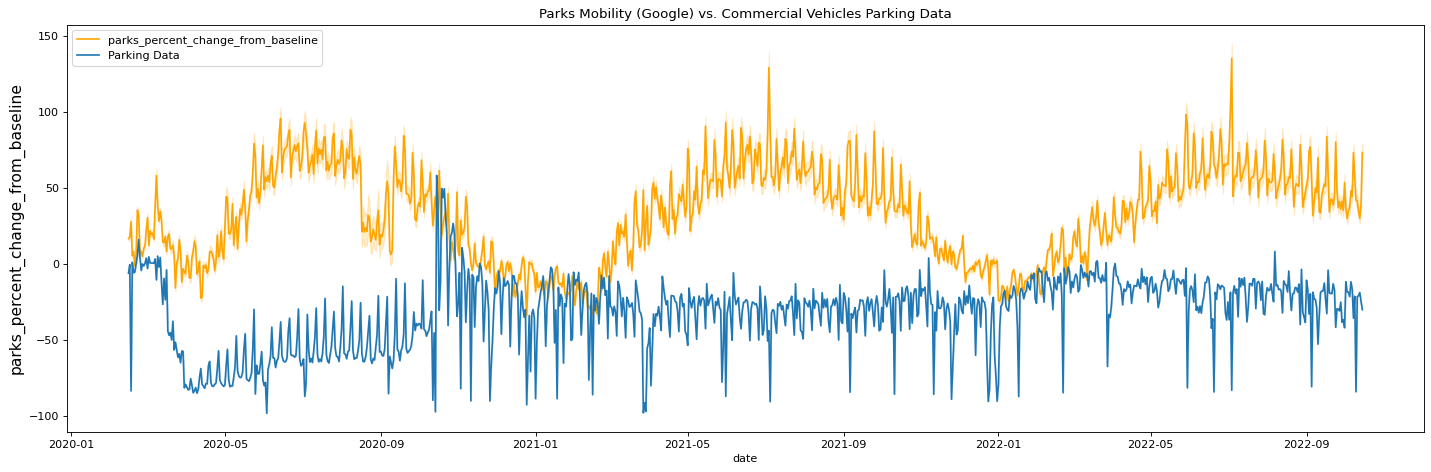

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18,6), dpi=80, sharex=True)
sns.lineplot(data=df_google, x="date", y= "parks_percent_change_from_baseline", label="parks_percent_change_from_baseline", color='Orange', ax=axes)
sns.lineplot(x=x_parking, y=y_parking, label='Parking Data', ax=axes)
axes.set_ylabel("parks_percent_change_from_baseline", fontsize = 14)
axes.set_title("Parks Mobility (Google) vs. Commercial Vehicles Parking Data")
axes.legend()
plt.tight_layout()
plt.show()


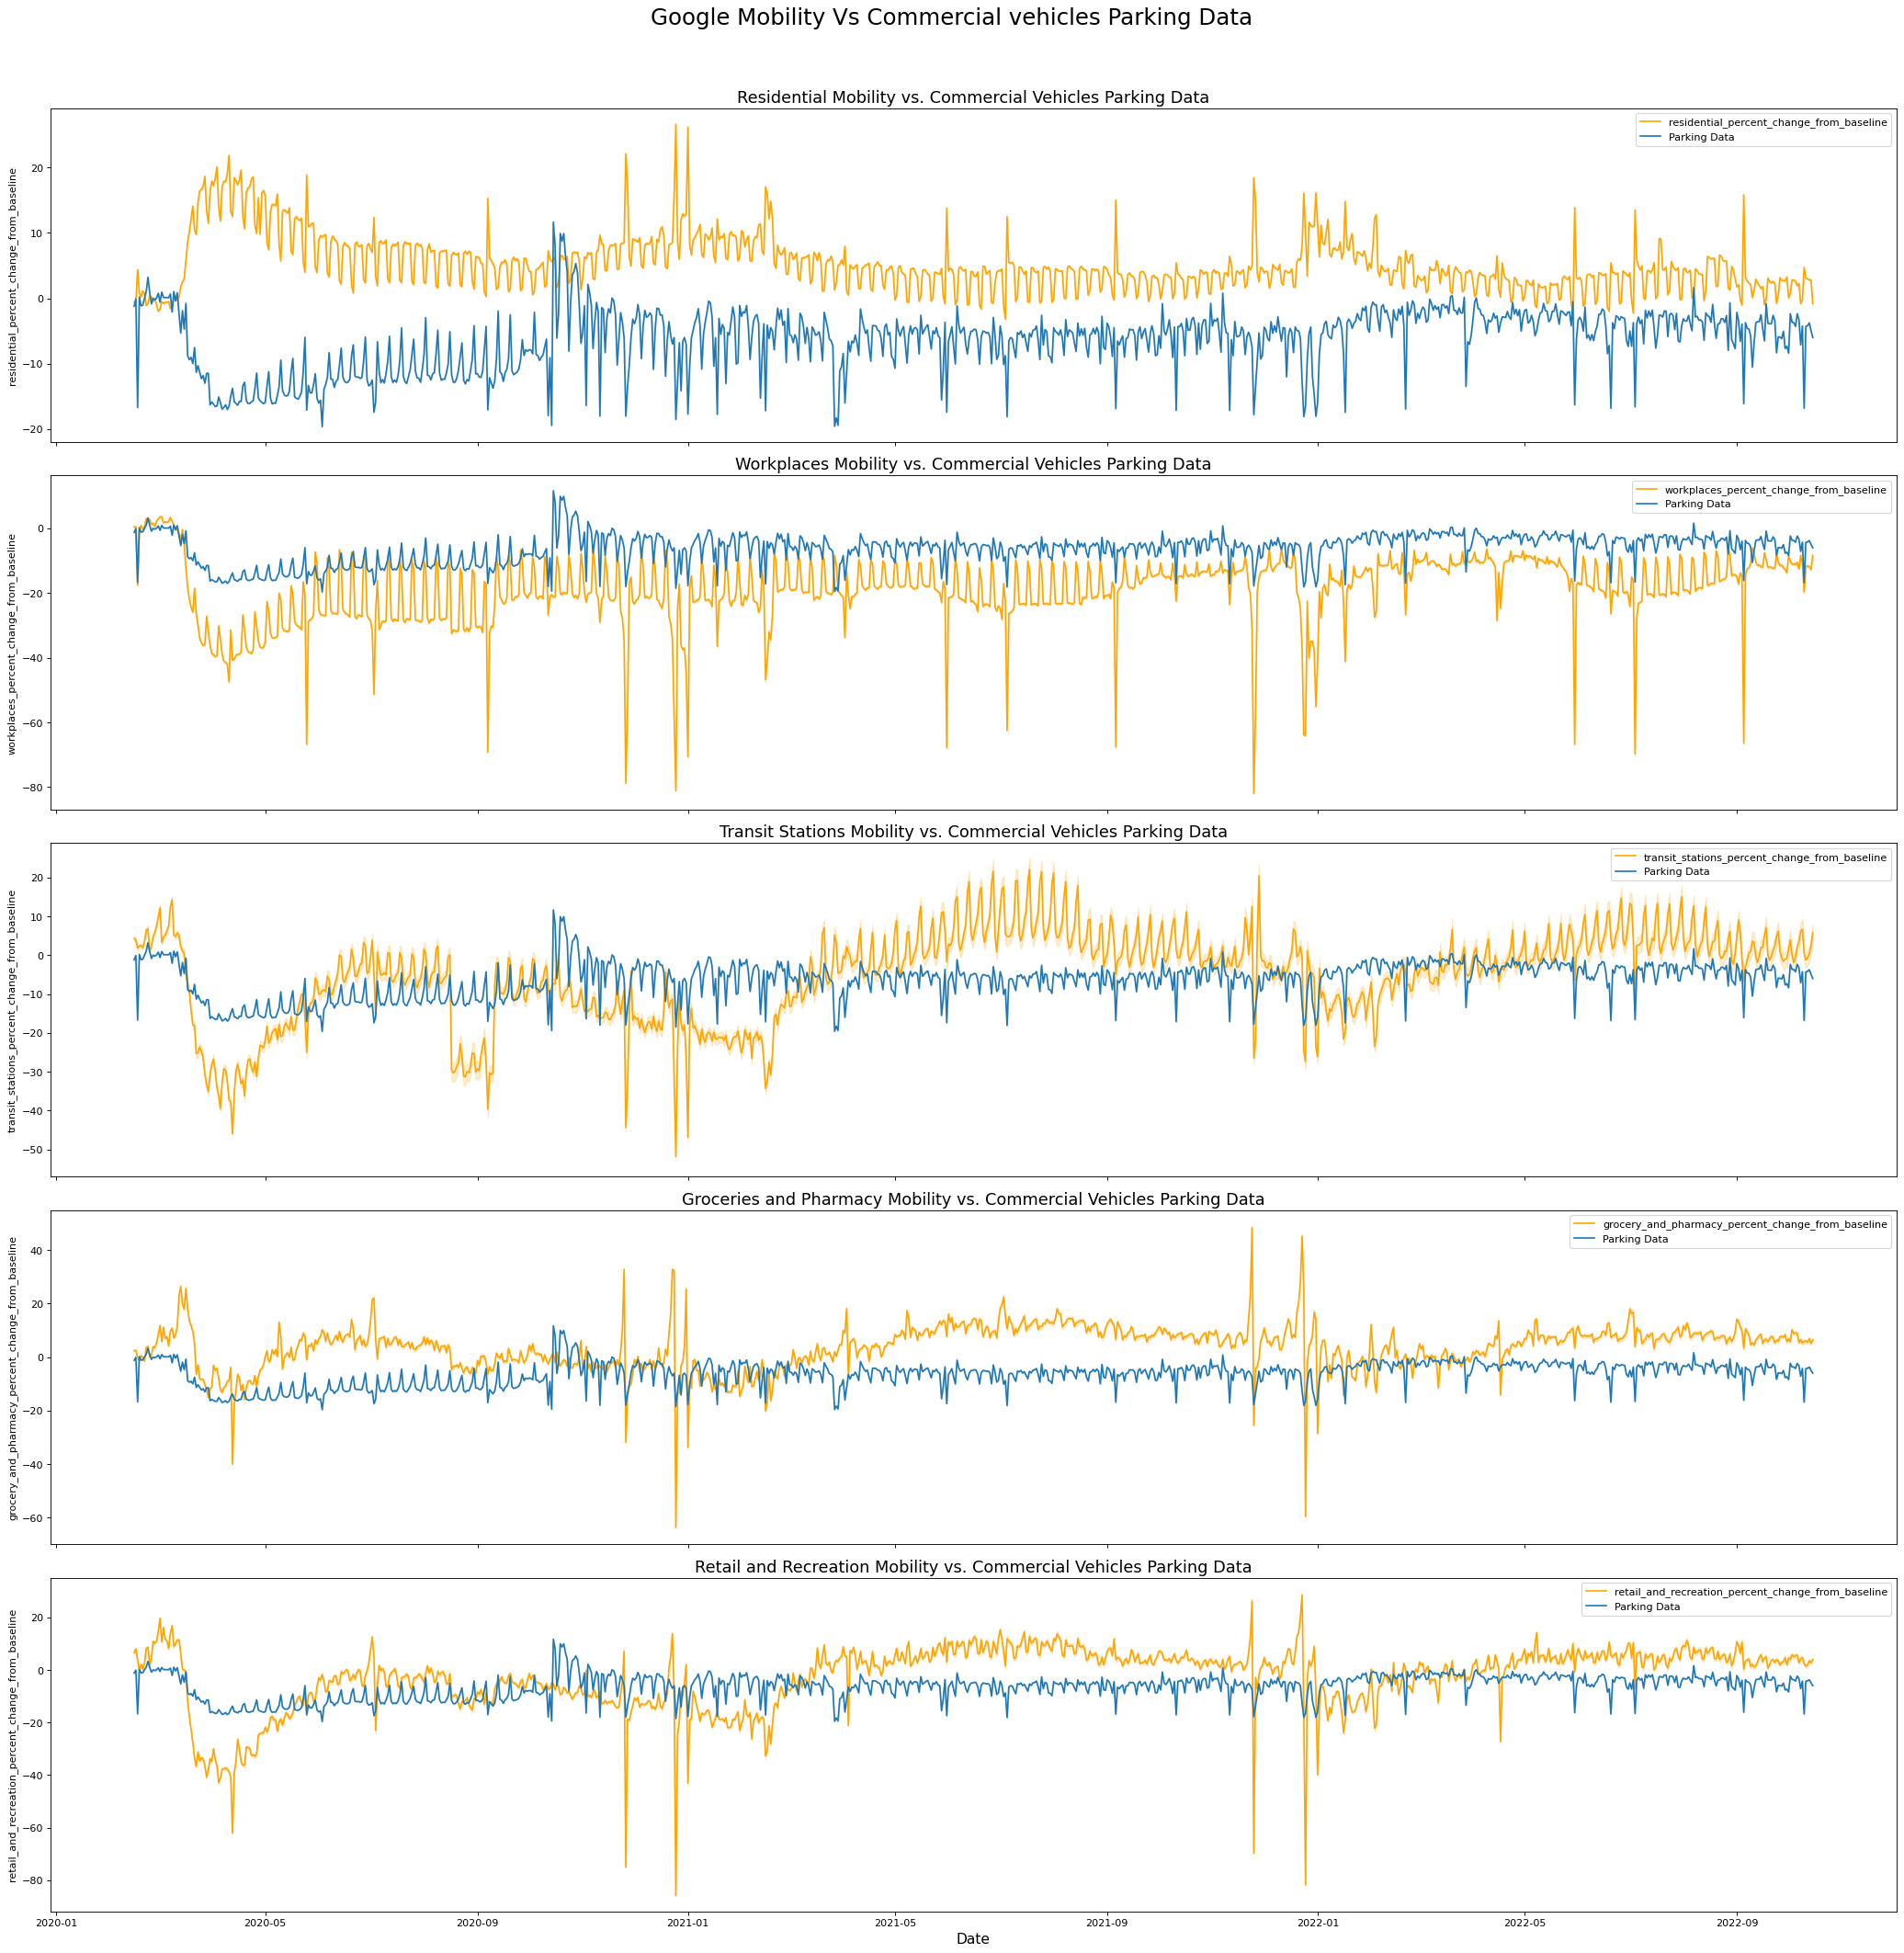

In [ ]:

fig, axes = plt.subplots(5, 1, figsize=(26, 26), dpi=80, sharex=True)
columns_to_compare = [
    "residential_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "retail_and_recreation_percent_change_from_baseline"
]
subplot_titles = [
    "Residential Mobility vs. Commercial Vehicles Parking Data",
    "Workplaces Mobility vs. Commercial Vehicles Parking Data",
    "Transit Stations Mobility vs. Commercial Vehicles Parking Data",
    "Groceries and Pharmacy Mobility vs. Commercial Vehicles Parking Data",
    "Retail and Recreation Mobility vs. Commercial Vehicles Parking Data"
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(data=df_google, x="date", y=df_google[column], label=column, color='Orange', ax=axes[i])
    sns.lineplot(x=x_parking, y=y_parking/5, label='Parking Data', ax=axes[i])
    axes[i].set_ylabel(column)
    axes[i].set_title(title, fontsize = 16)
    axes[i].legend()
axes[-1].set_xlabel('Date',fontsize = 14)
plt.suptitle("Google Mobility Vs Commercial vehicles Parking Data", fontsize = 22, y = 1.02)
plt.tight_layout()
plt.show()


####Plots showing Google Mobility Vs Non - Commercial Parking Data

In [ ]:
x_parking_n = non_commercial_vehicles_data_g['Issue Date']
y_parking_n =non_commercial_vehicles_data_g['pct_change']

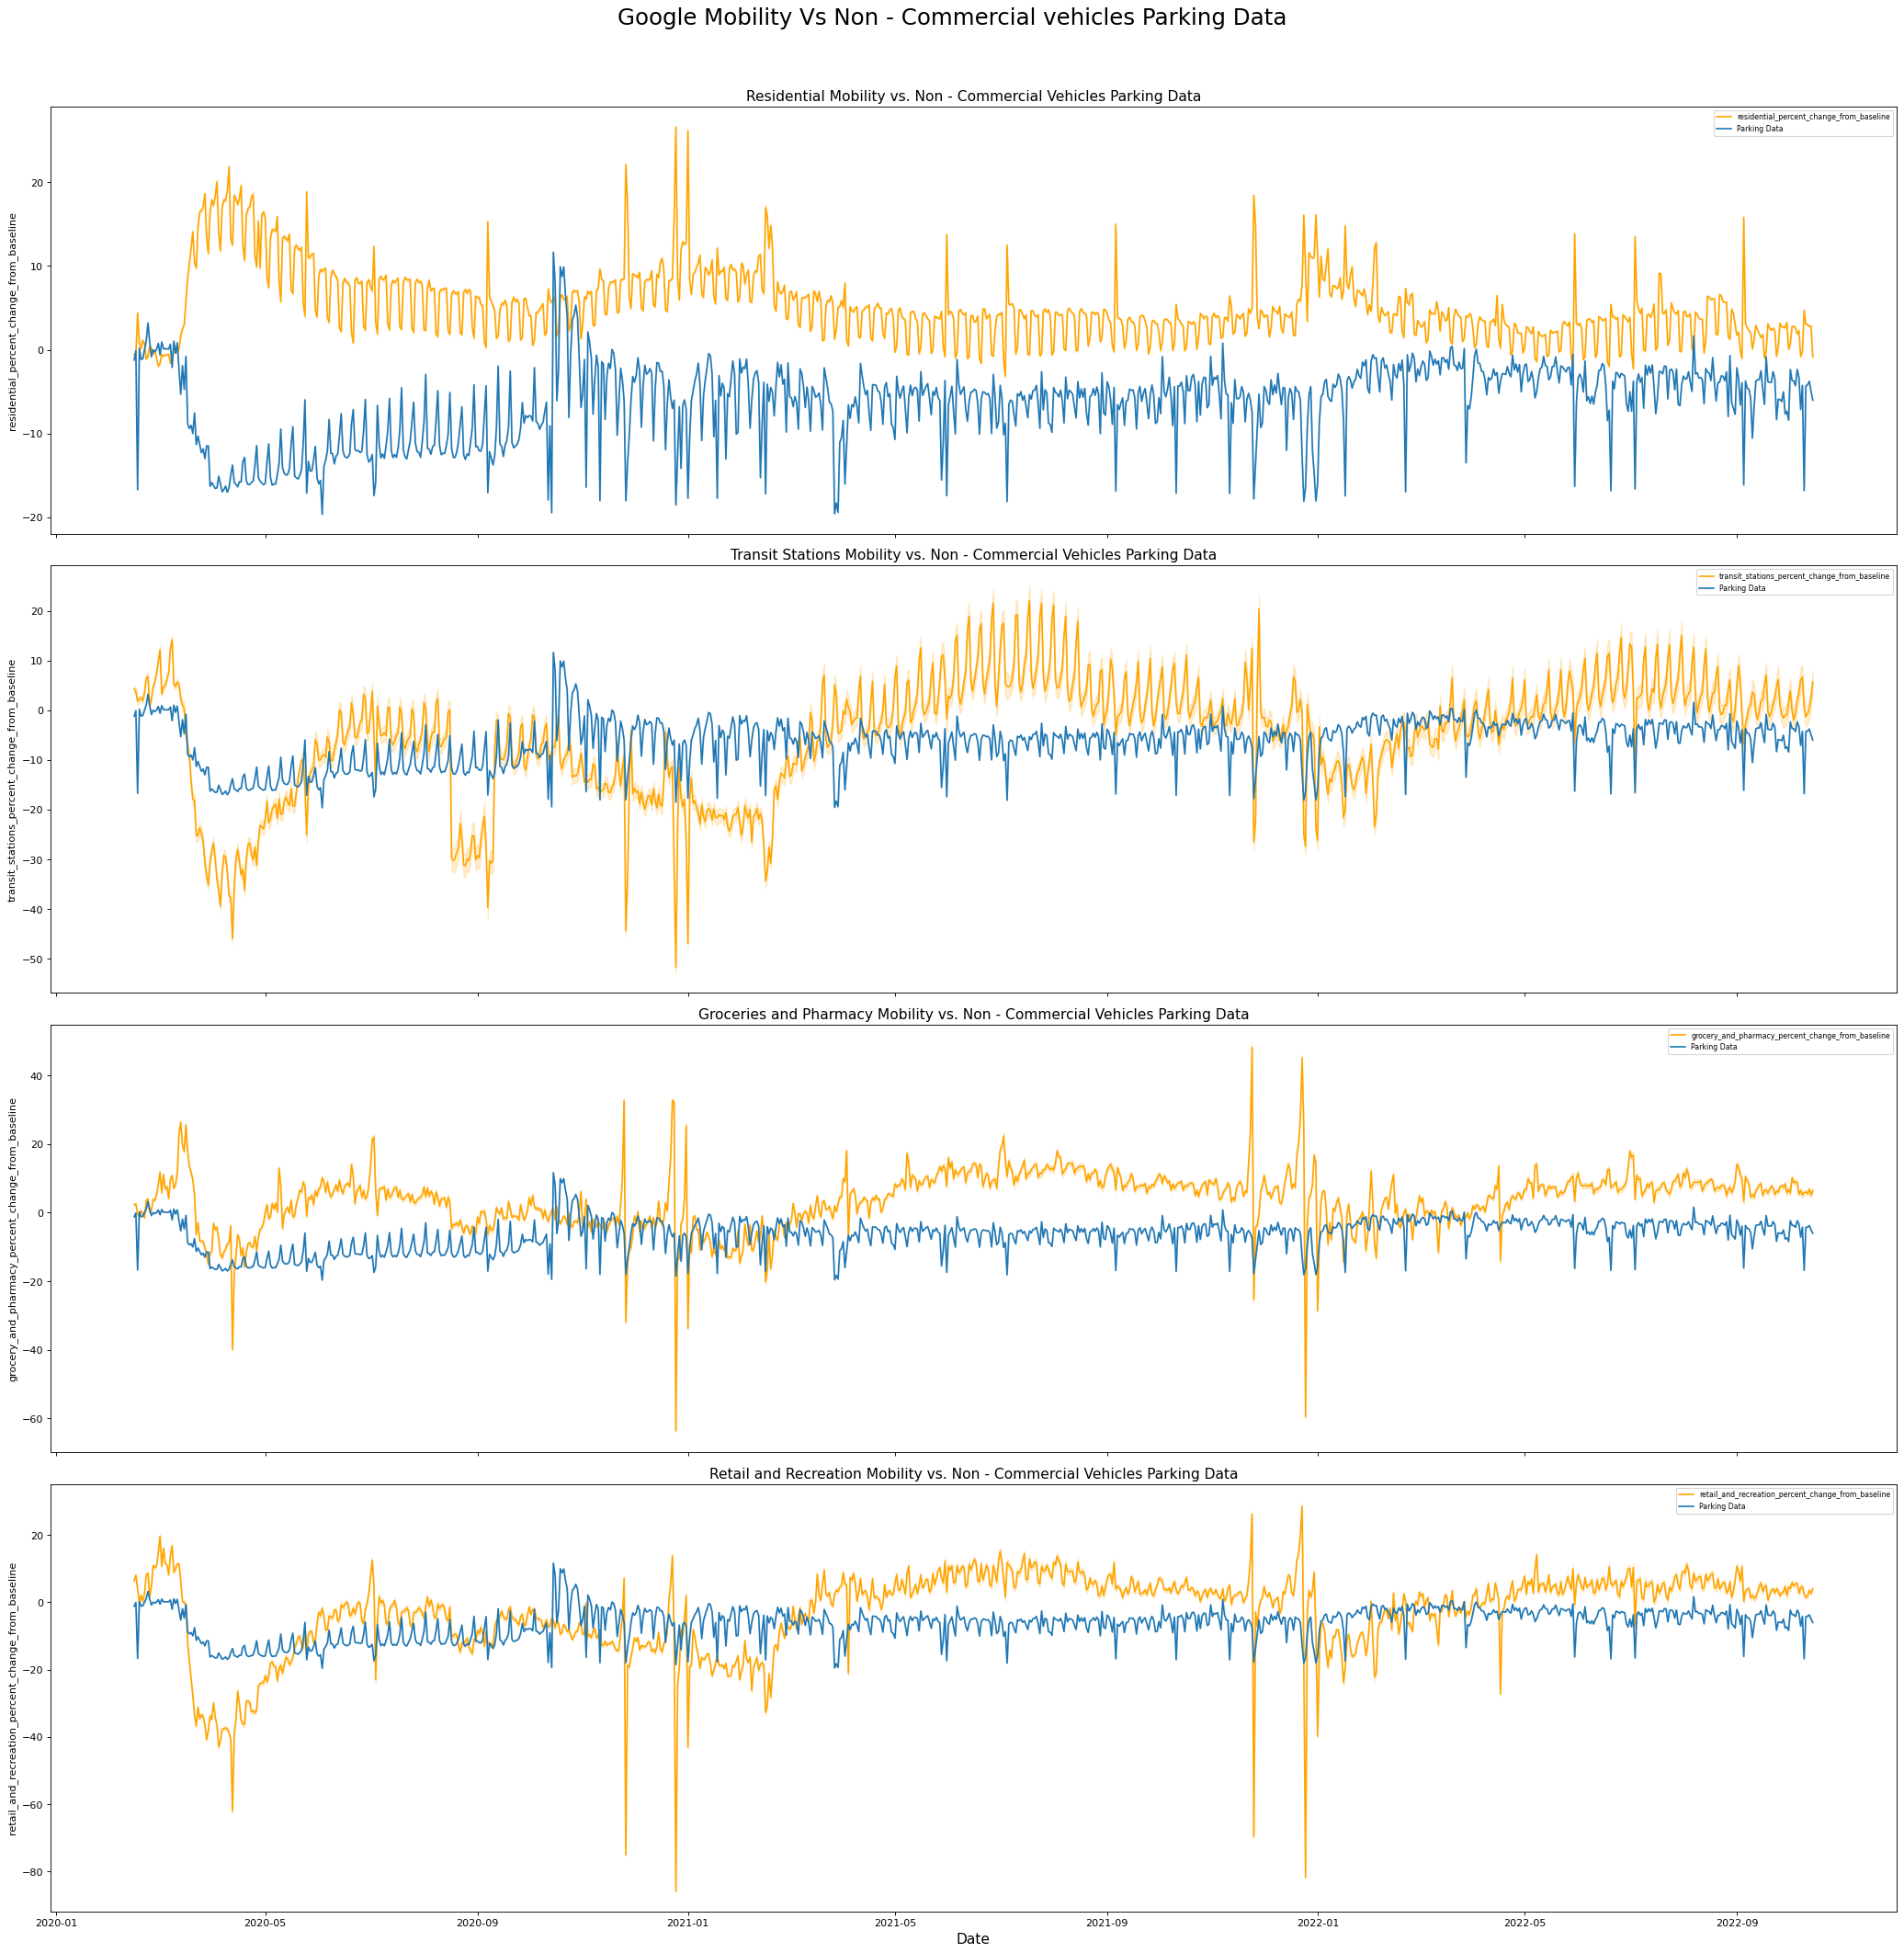

In [ ]:

fig, axes = plt.subplots(4, 1, figsize=(26, 26), dpi=80, sharex=True)

columns_to_compare = [
    "residential_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "retail_and_recreation_percent_change_from_baseline"
]
subplot_titles = [
    "Residential Mobility vs. Non - Commercial Vehicles Parking Data",
    "Transit Stations Mobility vs. Non - Commercial Vehicles Parking Data",
    "Groceries and Pharmacy Mobility vs. Non - Commercial Vehicles Parking Data",
    "Retail and Recreation Mobility vs. Non - Commercial Vehicles Parking Data"
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(data=df_google, x="date", y=df_google[column], label=column, color='Orange', ax=axes[i])
    sns.lineplot(x=x_parking_n, y=y_parking_n/5, label='Parking Data', ax=axes[i])
    axes[i].set_ylabel(column)
    axes[i].set_title(title, fontsize = 14)
    axes[i].legend(fontsize = 7)
axes[-1].set_xlabel('Date',fontsize = 14)
plt.suptitle("Google Mobility Vs Non - Commercial vehicles Parking Data", fontsize = 22, y = 1.02)
plt.tight_layout()
plt.show()


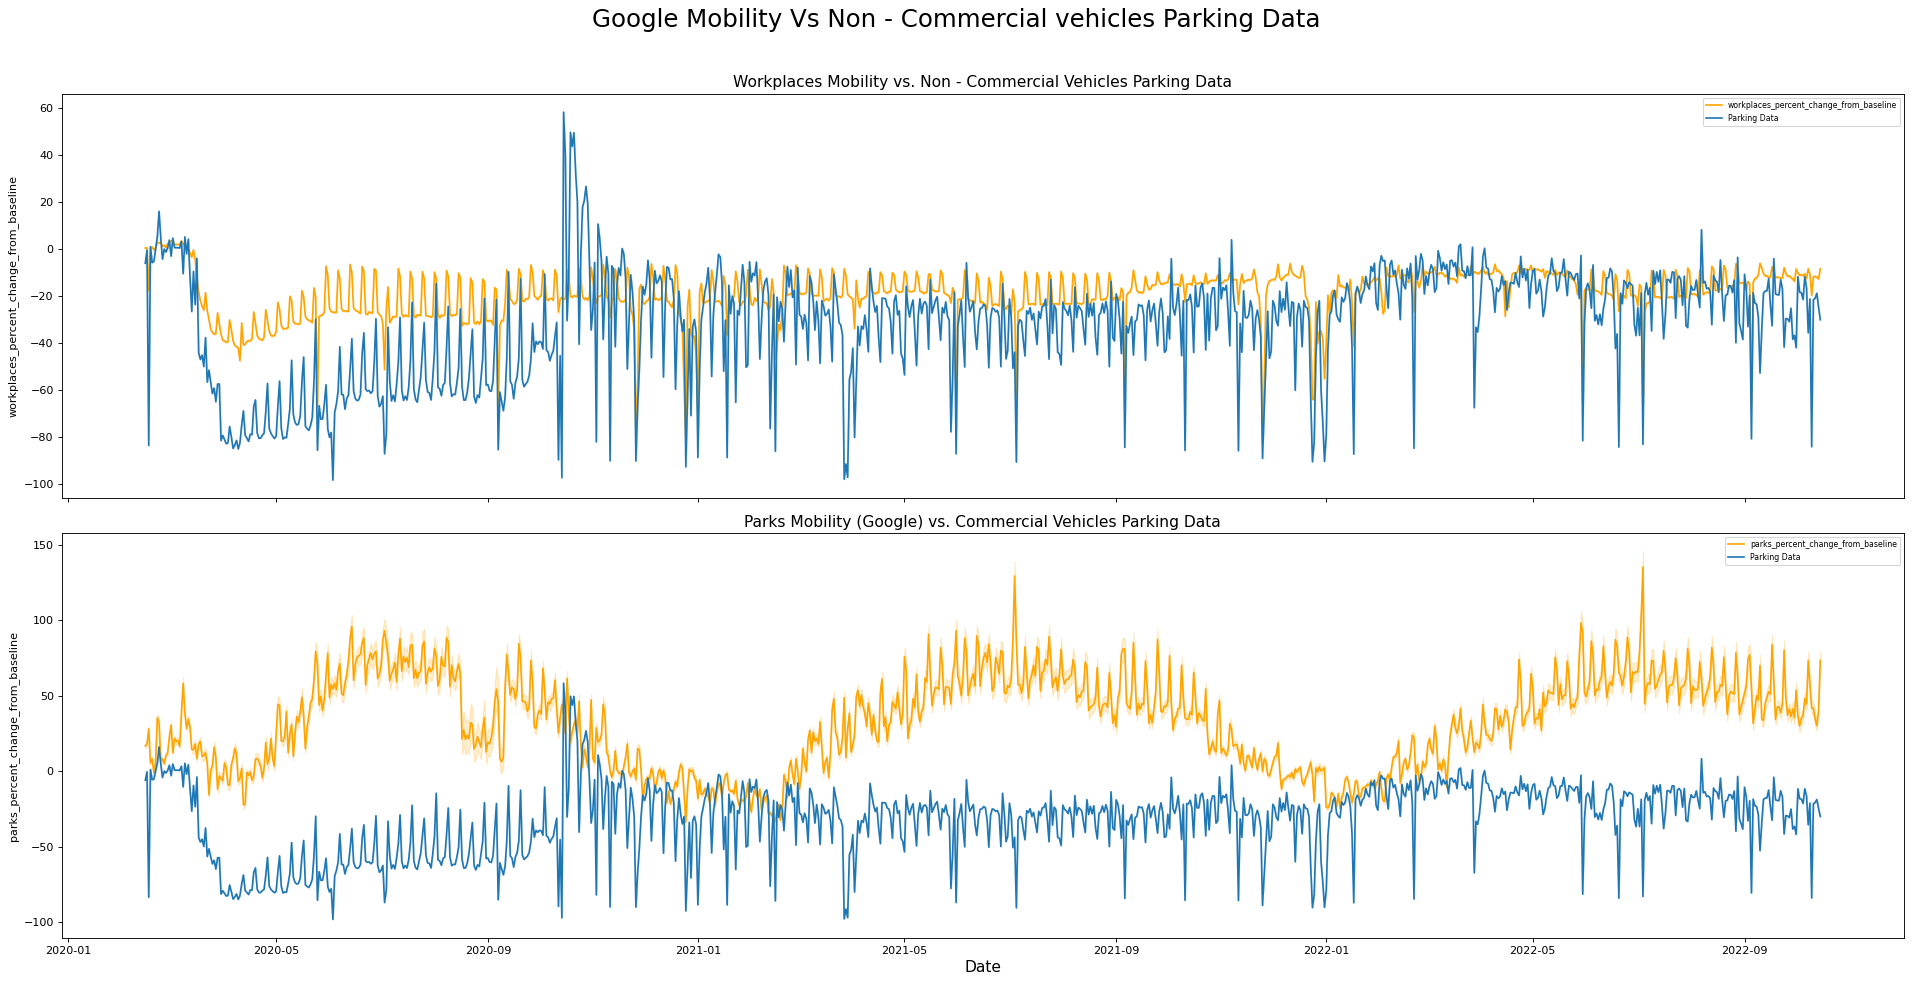

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(24, 12), dpi=80, sharex=True)

columns_to_compare = [

    "workplaces_percent_change_from_baseline",
    "parks_percent_change_from_baseline",

]
subplot_titles = [

    "Workplaces Mobility vs. Non - Commercial Vehicles Parking Data",
    "Parks Mobility (Google) vs. Commercial Vehicles Parking Data",
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(data=df_google, x="date", y=df_google[column], label=column, color='Orange', ax=axes[i])
    sns.lineplot(x=x_parking_n, y=y_parking_n, label='Parking Data', ax=axes[i])
    axes[i].set_ylabel(column)
    axes[i].set_title(title, fontsize = 14)
    axes[i].legend(fontsize = 7)
axes[-1].set_xlabel('Date',fontsize = 14)
plt.suptitle("Google Mobility Vs Non - Commercial vehicles Parking Data", fontsize = 22, y = 1.02)
plt.tight_layout()
plt.show()


###Apple timeseries

####Setting baseline as 13th January 2020 for parking data to calculate normalization

Filtering Apple Time range in Parking Data

In [ ]:

filtered_df_apple_cv = commercial_vehicles_data[(commercial_vehicles_data['Issue Date'] >= '01-13-2020') & (commercial_vehicles_data['Issue Date'] <= '10-26-2021')]
filtered_df_apple_ncv = non_commercial_vehicles_data[(non_commercial_vehicles_data['Issue Date'] >= '01-13-2020') & (non_commercial_vehicles_data['Issue Date'] <= '10-26-2021')]



Computing baseline for commercial parking data - baseline being 13th January 2020

In [ ]:

per_day_count_a_cv = filtered_df_apple_cv.groupby(df['Issue Date']).size()
per_day_count_a_cv = per_day_count_a_cv.to_frame().reset_index()
per_day_count_a_cv.columns = ['Issue Date', 'Counts']
per_day_count_a_cv.sort_values(by="Issue Date")
#per_day_count_a_cv['Rolling7DayAvg'] = per_day_count_a_cv['Counts'].rolling(window=7).mean()

# find the baseline count and percentage change from that
df_Jan_13_cv = per_day_count_a_cv.loc[per_day_count_a_cv['Issue Date'] == '2020-01-13']
df_Jan_13_cv = df_Jan_13_cv['Counts'].item()
per_day_count_a_cv['pct_change'] = ((per_day_count_a_cv['Counts'] - df_Jan_13_cv)*100)/df_Jan_13_cv


Computing baseline for non-commercial parking data - baseline being 13th January 2020

In [ ]:
per_day_count_a_ncv = filtered_df_apple_ncv.groupby(df['Issue Date']).size()
per_day_count_a_ncv = per_day_count_a_ncv.to_frame().reset_index()
per_day_count_a_ncv.columns = ['Issue Date', 'Counts']
per_day_count_a_ncv.sort_values(by="Issue Date")
#per_day_count_a_ncv['Rolling7DayAvg'] = per_day_count_a_ncv['Counts'].rolling(window=7).mean()
# find the baseline count and percentage change from that
df_Jan_13_ncv = per_day_count_a_ncv.loc[per_day_count_a_ncv['Issue Date'] == '2020-01-13']
df_Jan_13_ncv = df_Jan_13_ncv['Counts'].item()
per_day_count_a_ncv['pct_change'] = ((per_day_count_a_ncv['Counts'] - df_Jan_13_ncv)*100)/df_Jan_13_ncv


####Plots showing Apple Mobility Vs Commercial/ Non- Commercial Parking Datasets

**Plot that shows timeseries comparison between commercial and non commercial parking data and Mobilty dataset.**

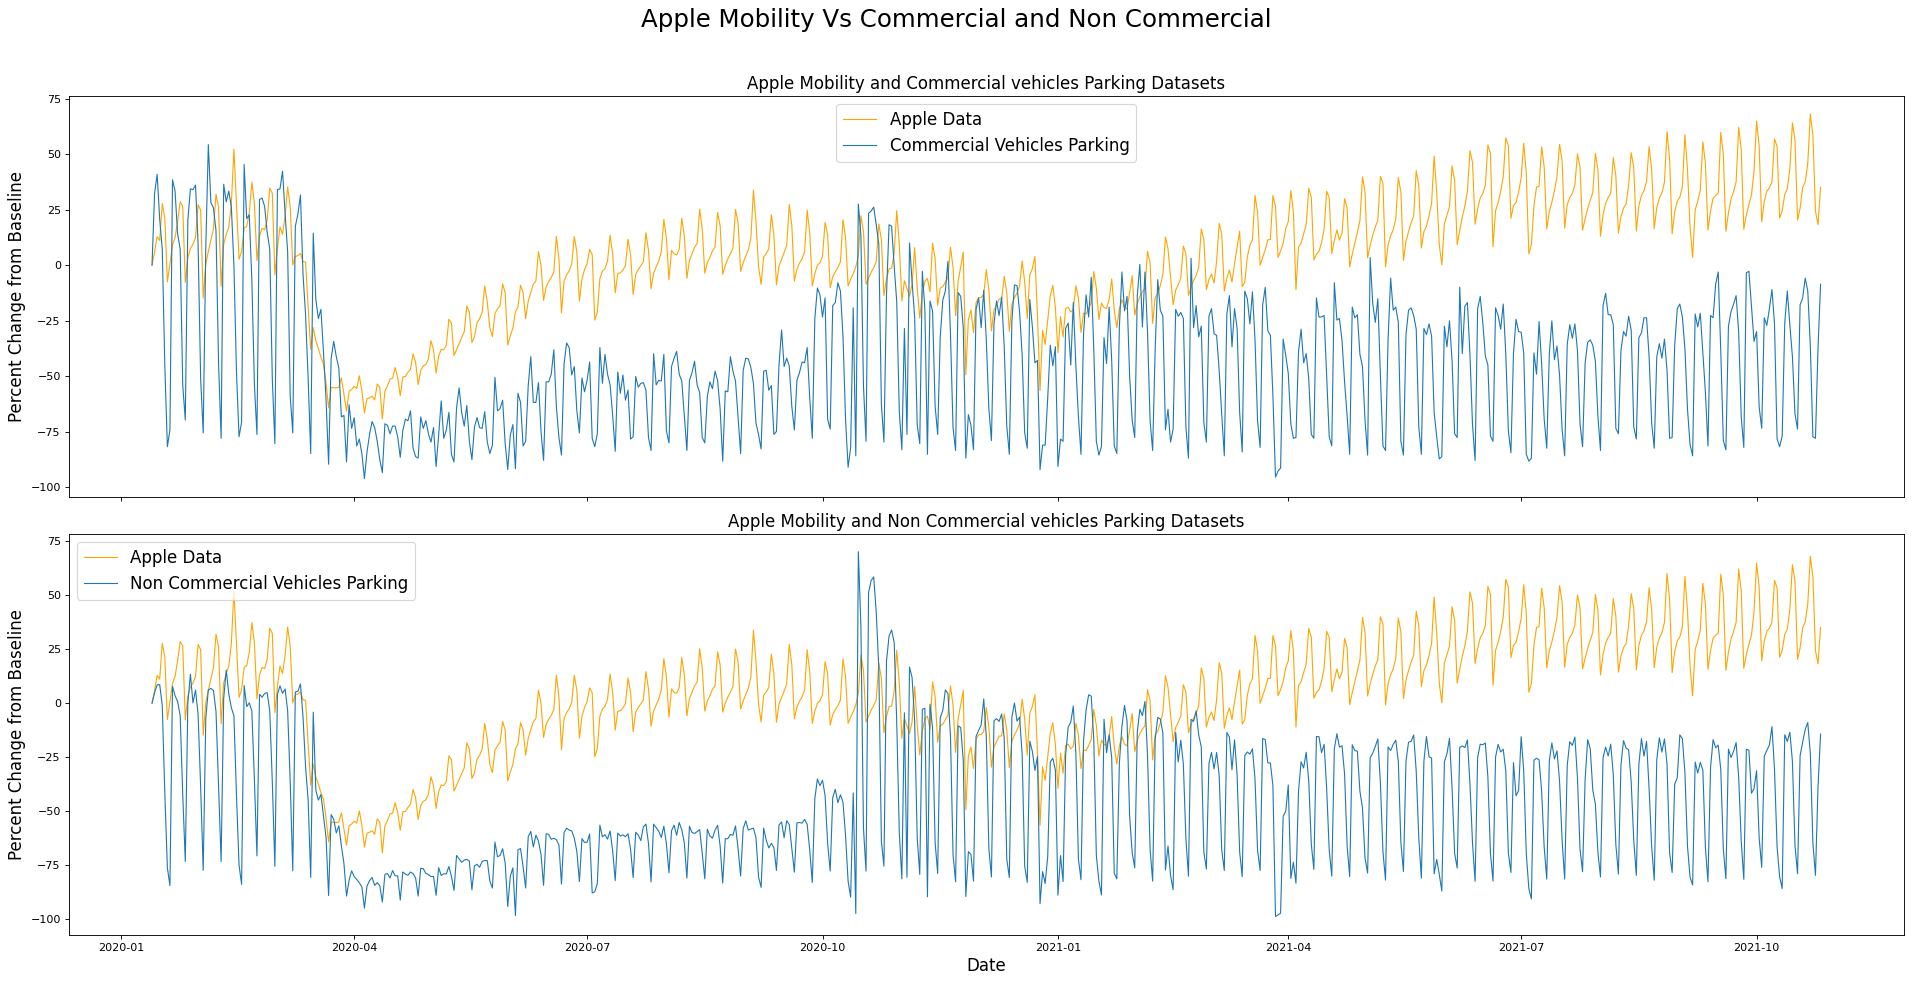

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(24, 12), dpi=80, sharex=True)

sns.lineplot(data=df_apple, x="Date", y=df_apple['Driving']-100, label='Apple Data', color = 'Orange', ax = axes[0], linewidth = 1)
sns.lineplot(data=per_day_count_a_cv, x="Issue Date", y=per_day_count_a_cv['pct_change'], label='Commercial Vehicles Parking', ax = axes[0],linewidth = 1)
axes[0].set_xlabel('Date', fontsize = 15)
axes[0].set_ylabel('Percent Change from Baseline', fontsize = 15)
axes[0].set_title('Apple Mobility and Commercial vehicles Parking Datasets', fontsize = 15)
axes[0].legend(fontsize = 15)

sns.lineplot(data=df_apple, x="Date", y=df_apple['Driving']-100, label='Apple Data', color = 'Orange',linewidth = 1, ax = axes[1])
sns.lineplot(data=per_day_count_a_ncv, x="Issue Date", y=per_day_count_a_ncv['pct_change'], linewidth = 1, label='Non Commercial Vehicles Parking', ax = axes[1])
axes[1].set_xlabel('Date', fontsize = 15)
axes[1].set_ylabel('Percent Change from Baseline', fontsize = 15)
axes[1].set_title('Apple Mobility and Non Commercial vehicles Parking Datasets', fontsize = 15)
axes[1].legend(fontsize = 15)

plt.suptitle('Apple Mobility Vs Commercial and Non Commercial', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()


###Meta timeseries

####Calculating Mean Normalisation for Parking data

Filtering parking data in meta data time range

In [ ]:
filtered_df_meta = df[(df['Issue Date'] >= '03-01-2020') & (df['Issue Date'] <= '5-22-2022')]
filtered_df_meta['Dayofweek'] = filtered_df_meta['Issue Date'].dt.day_name()

<ipython-input-20-bbbbaa125746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_meta['Dayofweek'] = filtered_df_meta['Issue Date'].dt.day_name()


In [ ]:
baseline_d = df[df['Issue Date'].dt.year == 2020][df['Issue Date'].dt.month == 2]

<ipython-input-21-06e34347434b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_d = df[df['Issue Date'].dt.year == 2020][df['Issue Date'].dt.month == 2]


In [ ]:
baseline_d['Dayofweek'] = baseline_d['Issue Date'].dt.day_name()

Computing average ticket counts for each weekday

In [ ]:
avg_list = []
weekdays = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
for i in range(len(weekdays)):
    d = baseline_d[baseline_d['Dayofweek'] == weekdays[i]]
    c = d.groupby('Issue Date')['Ticket number'].count()
    a = c.mean()
    avg_list.append(a)

In [ ]:
filtered_df_meta_cv = filtered_df_meta[filtered_df_meta['Body Style Description'].isin(commercial_vehicles)]
filtered_df_meta_ncv = filtered_df_meta[filtered_df_meta['Body Style Description'].isin(non_commercial_vehicles)]


In [ ]:
avg_baseline_df = pd.DataFrame({'Weekday' : weekdays, 'Avg_baseline_count' : avg_list})

In [ ]:
cv = pd.merge(filtered_df_meta_cv, avg_baseline_df, left_on = 'Dayofweek',right_on = 'Weekday', how = 'inner')
ncv = pd.merge(filtered_df_meta_ncv, avg_baseline_df, left_on = 'Dayofweek',right_on = 'Weekday', how = 'inner')

In [ ]:
per_day_count_m_cv = filtered_df_meta_cv.groupby(filtered_df_meta_cv['Issue Date']).size()
per_day_count_m_cv = per_day_count_m_cv.to_frame().reset_index()
per_day_count_m_cv.columns = ['Issue Date', 'Counts']

In [ ]:
per_day_count_m_ncv = filtered_df_meta_ncv.groupby(filtered_df_meta_ncv['Issue Date']).size()
per_day_count_m_ncv = per_day_count_m_ncv.to_frame().reset_index()
per_day_count_m_ncv.columns = ['Issue Date', 'Counts']

In [ ]:
per_day_count_m_cv['Dayofweek'] = per_day_count_m_cv['Issue Date'].dt.day_name()
per_day_count_m_ncv['Dayofweek'] = per_day_count_m_ncv['Issue Date'].dt.day_name()

In [ ]:
req_df_m_cv = pd.merge(per_day_count_m_cv, avg_baseline_df, left_on = 'Dayofweek', right_on = 'Weekday')
req_df_m_ncv = pd.merge(per_day_count_m_ncv, avg_baseline_df, left_on = 'Dayofweek', right_on = 'Weekday')

Computing the relative change of number of parking ticket counts from the average baseline on daily basis

In [ ]:
req_df_m_cv['relative_change'] = (req_df_m_cv['Counts'] - req_df_m_cv['Avg_baseline_count'])/req_df_m_cv['Avg_baseline_count']
req_df_m_ncv['relative_change'] = (req_df_m_ncv['Counts'] - req_df_m_ncv['Avg_baseline_count'])/req_df_m_ncv['Avg_baseline_count']

####Plots showing Meta Mobility Vs Commercial Parking Data

* Change in movement is obtained by counting the number of Bing Tiles
* Stay put is recorded when there is no movement is observed between two bing tiles for 24 hours.

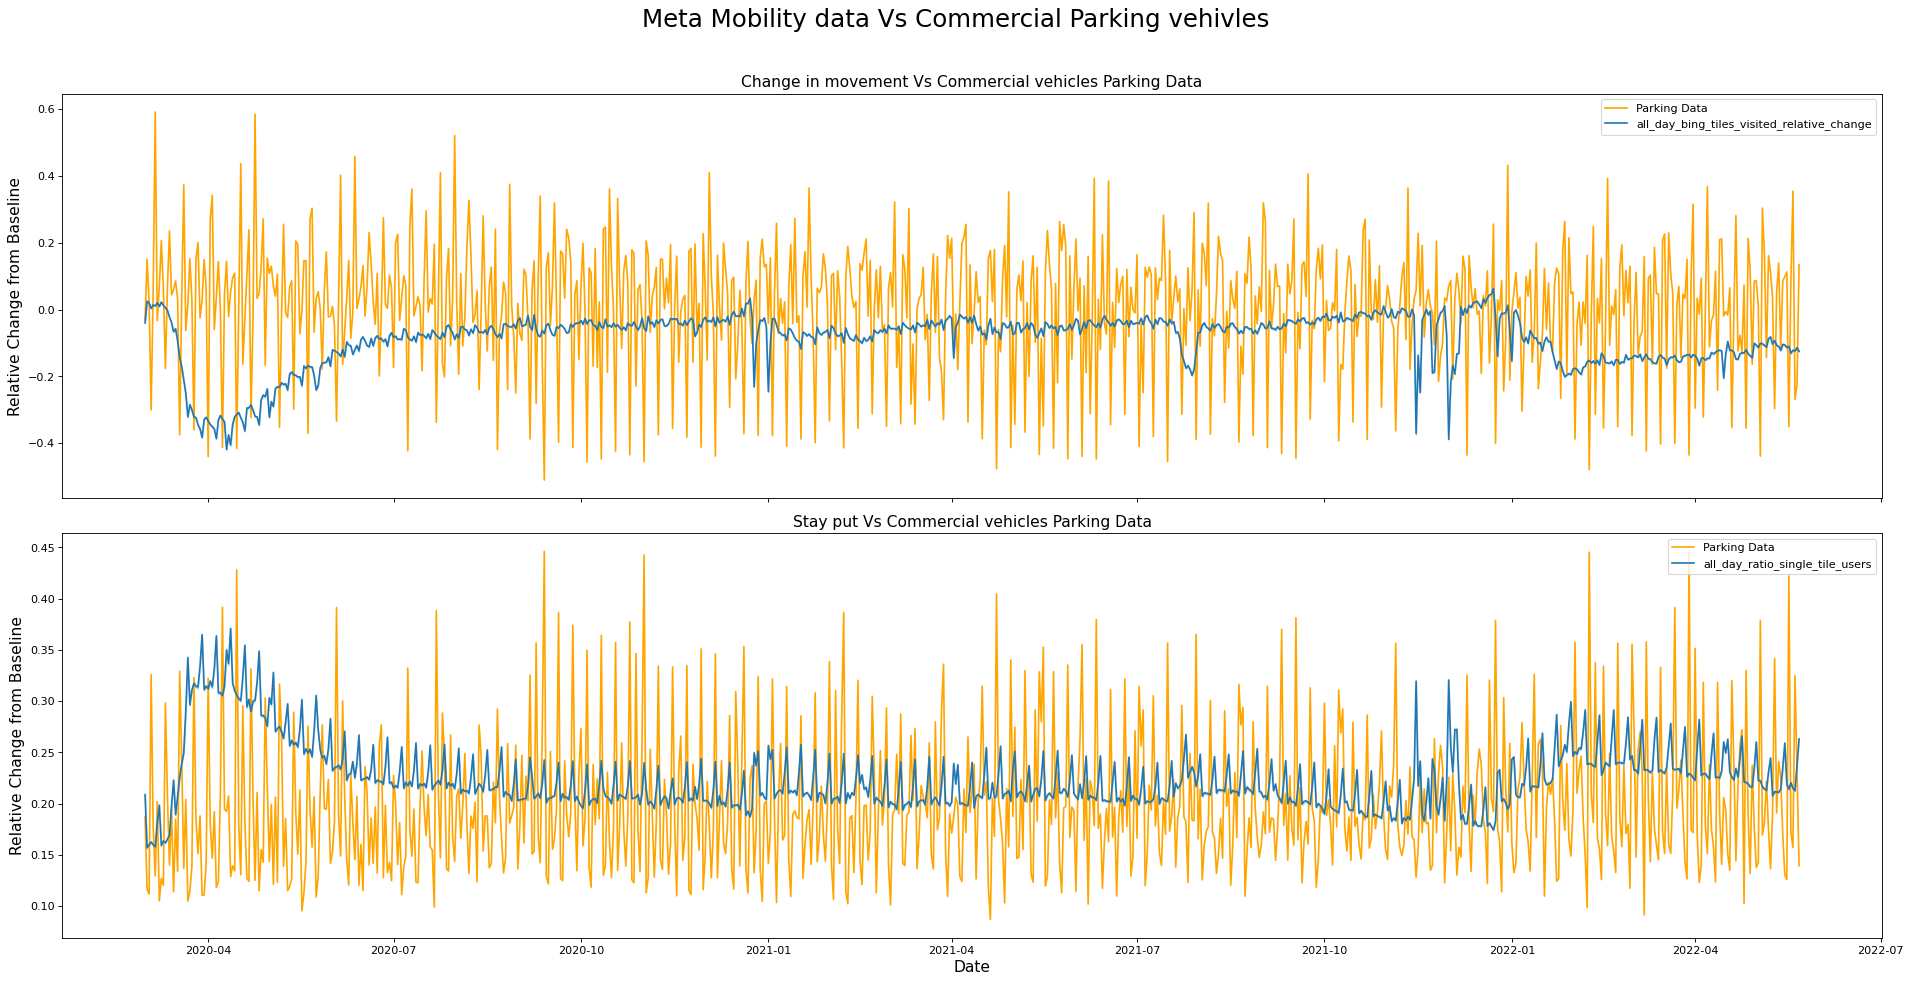

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(24, 12), dpi=80, sharex=True)
x_parking_cv = req_df_m_cv['Issue Date']
y_parking_cv = req_df_m_cv['relative_change']
columns_to_compare = [ 'all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users'

]
subplot_titles = [
    'Change in movement Vs Commercial vehicles Parking Data', 'Stay put Vs Commercial vehicles Parking Data'
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(x=x_parking_cv, y = y_parking_cv + (df_meta[column]-y_parking_cv), label='Parking Data', color='Orange',ax=axes[i])
    sns.lineplot(data=df_meta, x="ds", y = column, label=column,  ax=axes[i])
    axes[i].set_ylabel('Relative Change from Baseline', fontsize = 14)
    axes[i].set_title(title, fontsize = 14)
    axes[i].legend(loc = "upper right",fontsize = 10)
    axes[i].set_xlabel('Date', fontsize = 14)
plt.suptitle('Meta Mobility data Vs Commercial Parking vehivles',fontsize = 22, y=1.02)
plt.tight_layout()
plt.show()

####Plots showing Meta Mobility Vs Non - Commercial Parking Data

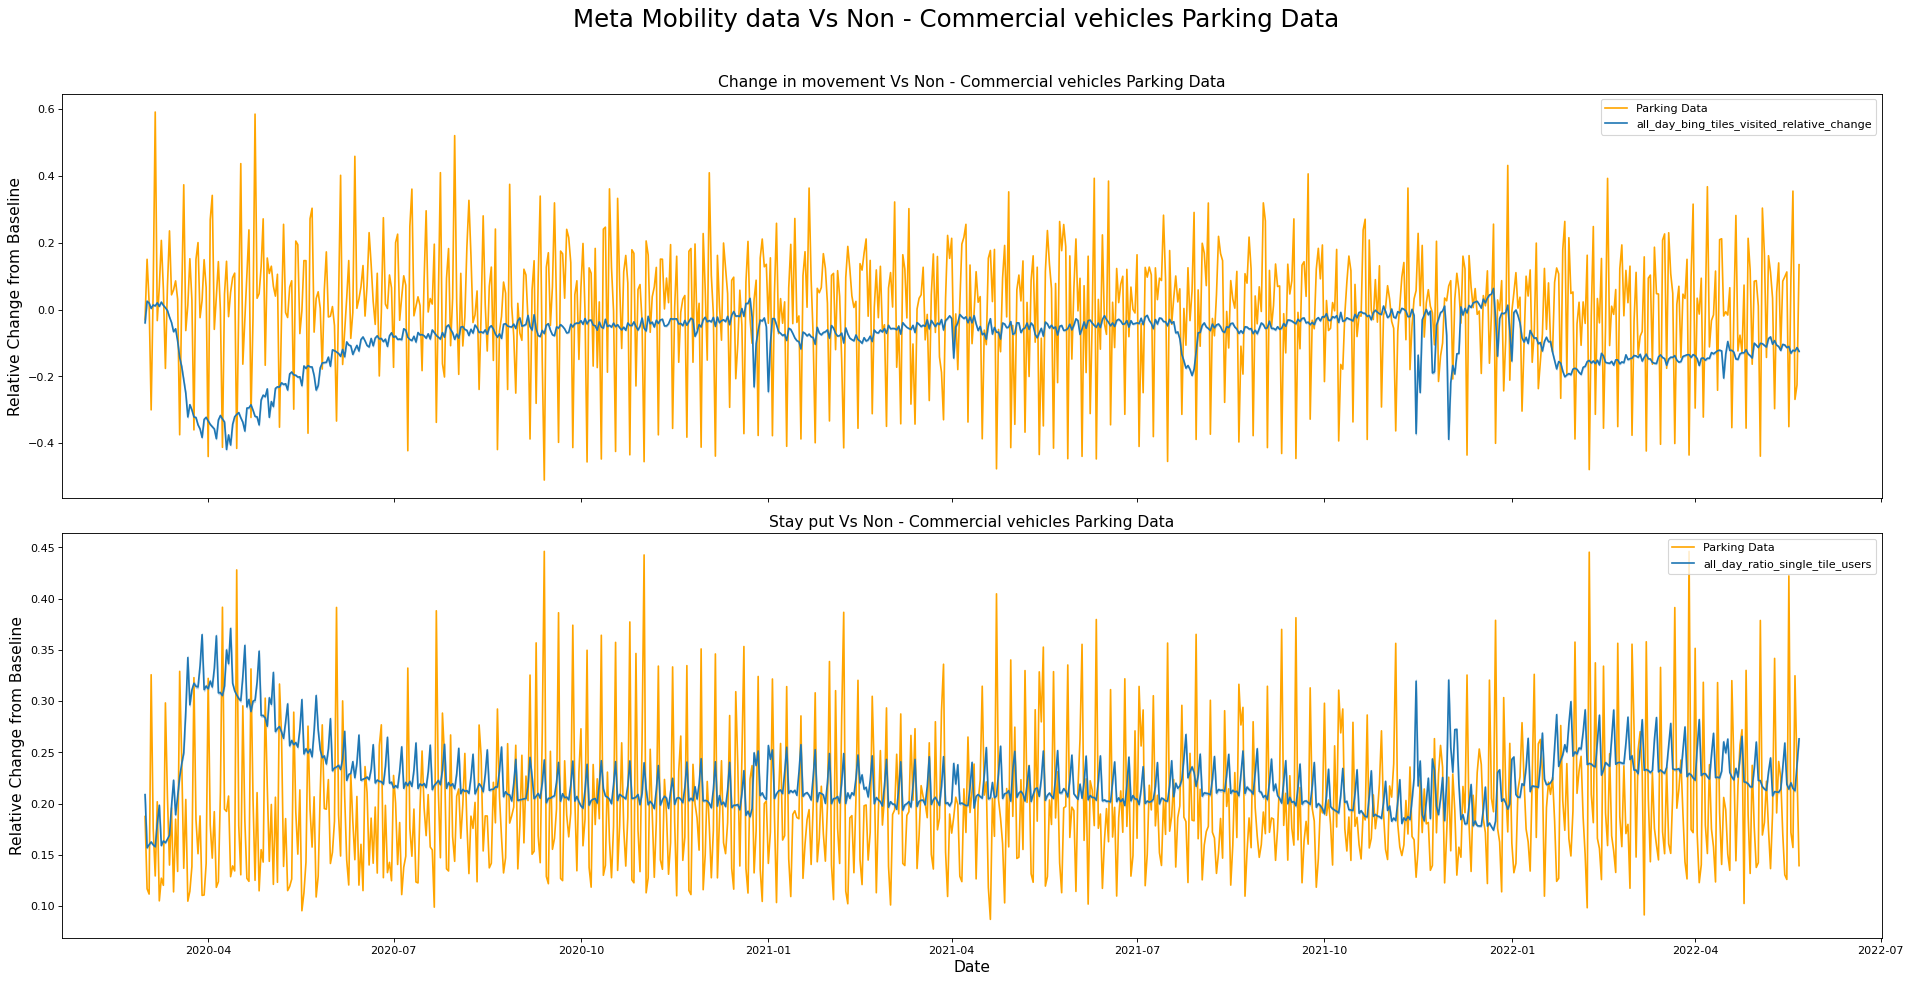

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(24, 12), dpi=80, sharex=True)
x_parking_ncv = req_df_m_ncv['Issue Date']
y_parking_ncv = req_df_m_ncv['relative_change']
columns_to_compare = [ 'all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users'

]
subplot_titles = [
    'Change in movement Vs Non - Commercial vehicles Parking Data', 'Stay put Vs Non - Commercial vehicles Parking Data'
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(x=x_parking_ncv, y = y_parking_ncv + (df_meta[column]-y_parking_ncv), color='Orange', label='Parking Data', ax=axes[i])
    sns.lineplot(data=df_meta, x="ds", y = column, label=column,  ax=axes[i])
    axes[i].set_ylabel('Relative Change from Baseline', fontsize = 14)
    axes[i].set_title(title, fontsize = 14)
    axes[i].legend(loc = "upper right",fontsize = 10)
    axes[i].set_xlabel('Date', fontsize = 14)
plt.suptitle('Meta Mobility data Vs Non - Commercial vehicles Parking Data', fontsize =22, y = 1.02)
plt.tight_layout()
plt.show()

# Misceleneous (My rough work)

In [ ]:
dfg = df[(df['Issue Date']>= '02-15-2020') & (df['Issue Date']<= '10-15-2022')]

In [ ]:
dfg['Total_Ticket_Count'] = dfg['Ticket number'].groupby(dfg['Issue Date']).transform('count')

<ipython-input-13-20b33ccc0f72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg['Total_Ticket_Count'] = dfg['Ticket number'].groupby(dfg['Issue Date']).transform('count')


In [ ]:
dfg[['Total_Ticket_Count','Issue Date']].nunique()

Total_Ticket_Count    913
Issue Date            974
dtype: int64

In [ ]:
mobility_data_mean_retail = df_google['retail_and_recreation_percent_change_from_baseline'].mean()
mobility_data_std_retail = df_google['retail_and_recreation_percent_change_from_baseline'].std()
parking_data_mean= dfg['Total_Ticket_Count'].mean()
parking_data_std = dfg['Total_Ticket_Count'].std()

In [ ]:
scaled_parking_data = (dfg['Total_Ticket_Count'] - parking_data_mean) / parking_data_std

In [ ]:

scaled_mobility_index_data = (df_google['retail_and_recreation_percent_change_from_baseline'] - mobility_data_mean_retail) / mobility_data_std_retail


In [ ]:
scaled_mobility_index_data

0         -2.019445
1         -0.863094
2         -0.561438
3         -0.561438
4         -0.661990
             ...   
2511989         NaN
2511990         NaN
2511991         NaN
2511992         NaN
2511993         NaN
Name: retail_and_recreation_percent_change_from_baseline, Length: 2511994, dtype: float64

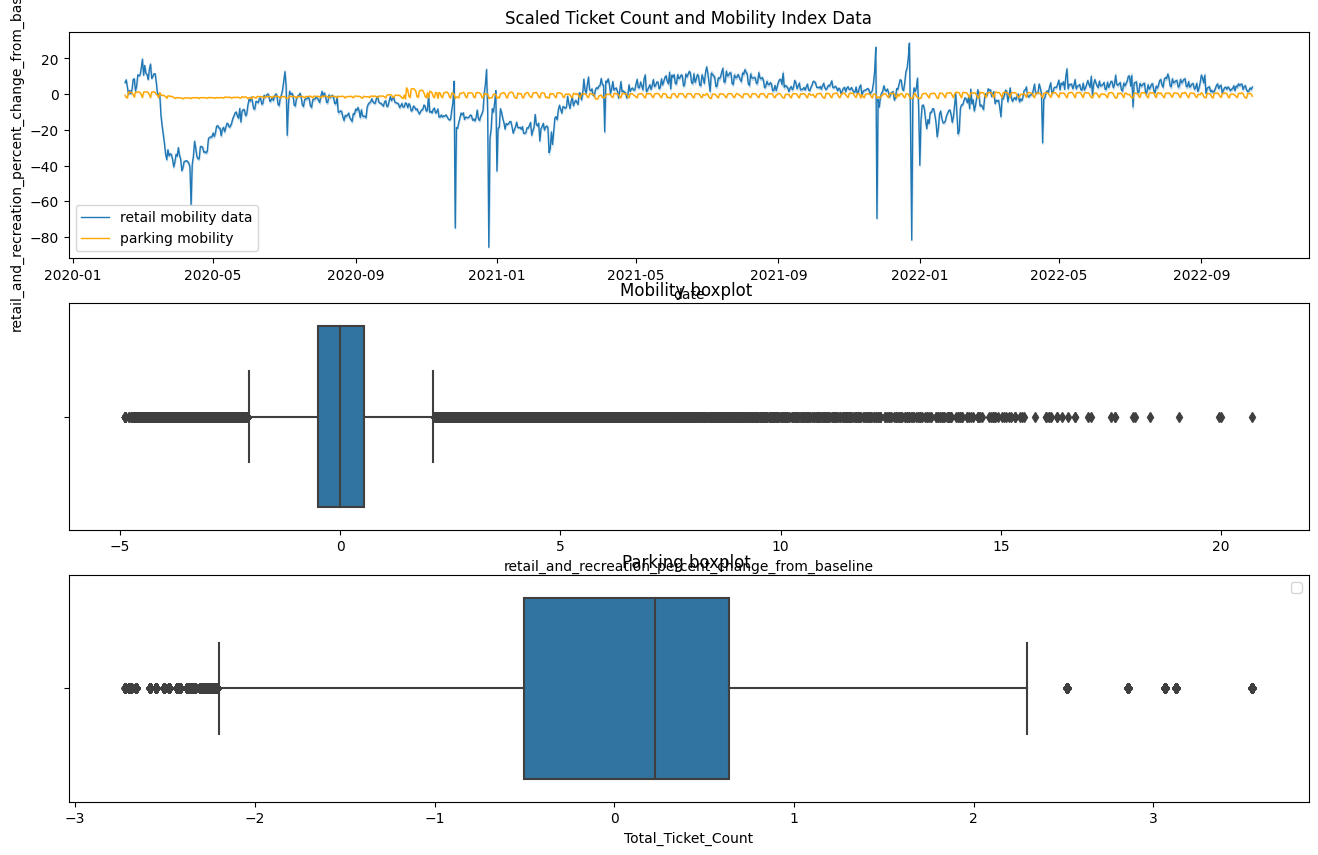

In [ ]:
fig, axes = plt.subplots(3,1,figsize = (16,10))
sns.lineplot(data = df_google, x = 'date', y = df_google['retail_and_recreation_percent_change_from_baseline'], linewidth = 1, ax = axes[0],  label = 'retail mobility data')
sns.lineplot(data = dfg, x = 'Issue Date', y = scaled_parking_data, linewidth = 1, ax= axes[0], color = 'orange', label = 'parking mobility')
axes[0].set_title('Scaled Ticket Count and Mobility Index Data')
sns.boxplot(x = scaled_mobility_index_data, ax = axes[1])
axes[1].set_title('Mobility boxplot ')
sns.boxplot( x = scaled_parking_data , ax = axes[2])
axes[2].set_title('Parking boxplot ')
plt.legend()
plt.show()

<Axes: xlabel='retail_and_recreation_percent_change_from_baseline'>

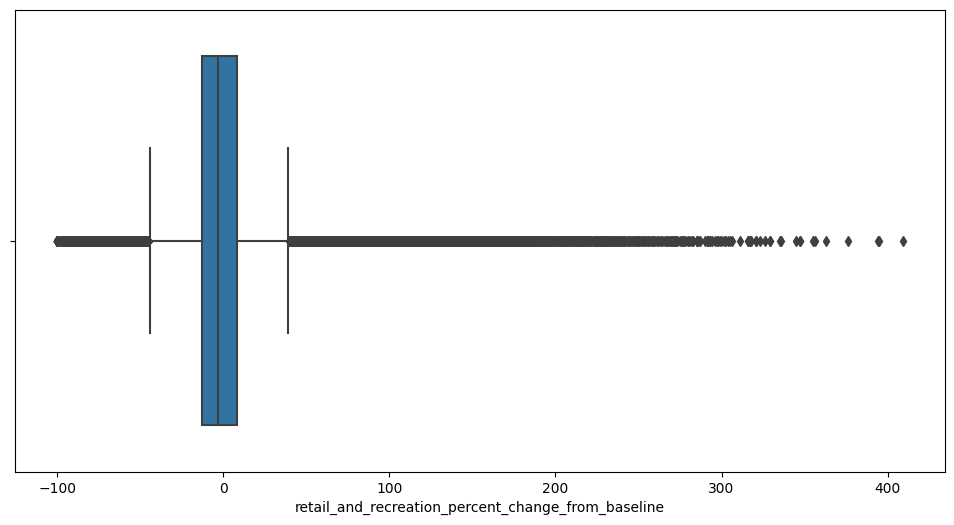

In [ ]:
fig = plt.figure(figsize = (12,6))
sns.boxplot(x = df_google['retail_and_recreation_percent_change_from_baseline'])

<Axes: xlabel='Total_Ticket_Count'>

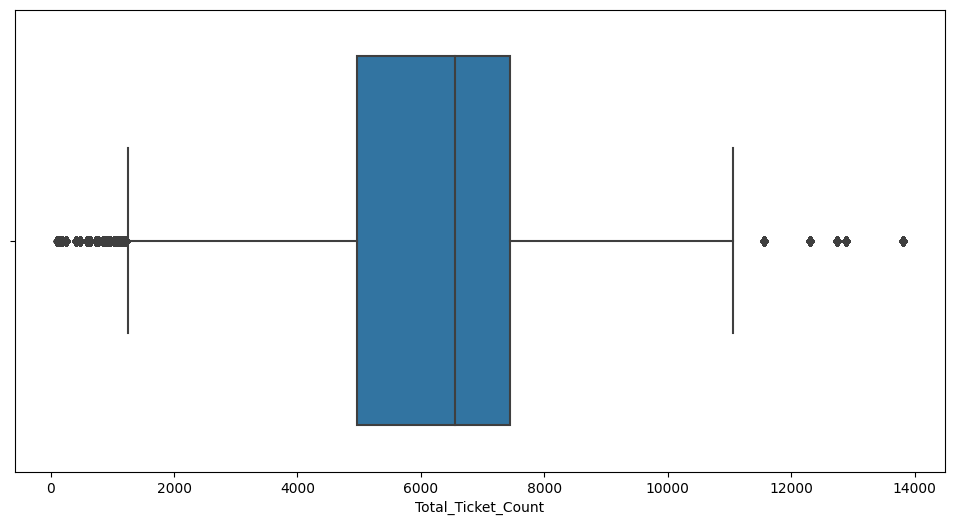

In [ ]:
fig = plt.figure(figsize = (12,6))
sns.boxplot(x = dfg['Total_Ticket_Count'])